## On a line between two points, find a point that is closest to third point 

**Author:** Matthias Heise, November 2017

This is according to [this question on Stackoverflow](https://stackoverflow.com/questions/47177493/python-point-on-a-line-closest-to-third-point/47178534?noredirect=1#comment81308312_47178534). Starting with a line/vector between two XY points (p1 and p2) we want to examine a third XY point (p3) that is outside the line. This includes the the point (p4) on that line that is in a minimum distance (d) to the third point (p3).

![](../plots/point_to_line.png)

In [146]:
points = [[1, 1], [3, 1], [2.5, 2], [2.5, 1]]

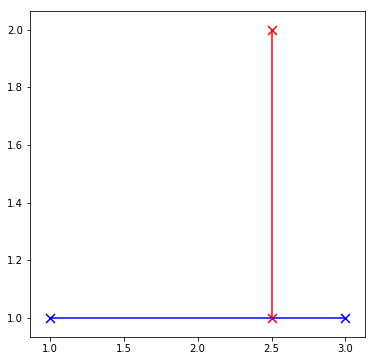

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

x, y = zip(*points[:2])
l1, = ax.plot(x,y, color='blue')
scatter1 = ax.scatter(x=x,y=y, color='blue', marker='x', s=80, alpha=1.0)

x, y = zip(*points[2:])
l2, = ax.plot(x,y, color='red')
scatter2 = ax.scatter(x=x,y=y, color='red', marker='x', s=80, alpha=1.0)

In [144]:
import math

p1_ = points[0]
p2_ = points[1]
p3_ = points[2]

class Vector2D:
    def __init__(self, x: float, y:float):
        self.x = x
        self.y = y

    def from_coordinates(x1:float, y1:float, x2:float, y2:float) -> Vector2D:
        return Vector2D(x2 - x1, y2 - y1)

    def from_point(p:list) -> Vector2D:
        return Vector2D(*p)
    
    def from_points(p1:list, p2:list) -> Vector2D:
        return Vector2D.from_coordinates(*p1, *p2)
   
    def get_vector(self) -> (float, float):
        return (self.x, self.y)

    def get_length(self) -> float:
        vector = self.get_vector()
        dist = math.hypot(*vector)
        return dist
    
    def multiply(self, value:float) -> Vector2D:
        return Vector2D(self.x * value, self.y * value)
    
    def add_vector(self, vector:Vector2D) -> Vector2D:
        return self.add(*vector.get_vector())

    def sub_vector(self, vector:Vector2D) -> Vector2D:
        x, y = vector.get_vector()
        return self.add(x * -1, y * -1)
    
    def add(self, x:float, y:float) -> Vector2D:
        return Vector2D(self.x + x, self.y + y)
    
    def get_angle_radians(self, vector:Vector2D) -> float:
        x, y = self.sub_vector(vector).get_vector()
        return math.atan2(y, x)

    def get_angle_degrees(self, vector:Vector2D) -> float:
        radians = self.get_angle_radians(vector)
        return math.degrees(radians)
    
    def __repr__(self):
        return str(self.get_vector())

    
vector = Vector2D.from_points(p1_, p2_)
vector.get_length()

2.0

In [145]:
p1 = Vector2D(*p1_)
p2 = Vector2D(*p2_)
p3 = Vector2D(*p3_)

p1p2 = p2.sub_vector(p1)
p1p3 = p3.sub_vector(p1)

angle_p1p2_p1p3 = p1p2.get_angle_radians(p1p3)
length_p1p3 = p1p3.get_length()
length_p1p2 = p1p2.get_length()

p4 = p1.add_vector(p1p2.multiply(p1p3.get_length()/p1p2.get_length()).multiply(math.cos(p1p2.get_angle_radians(p1p3))))

#p4 = p1 + p1p2 * length(p1p3)/length(p1p2)*cos(angle(p1p2, p1p3))

p4 = p1.add_vector(p1p2.multiply(length_p1p3/length_p1p2*math.cos(angle_p1p2_p1p3)))
p4

(1.8062257748298551, 1.0)